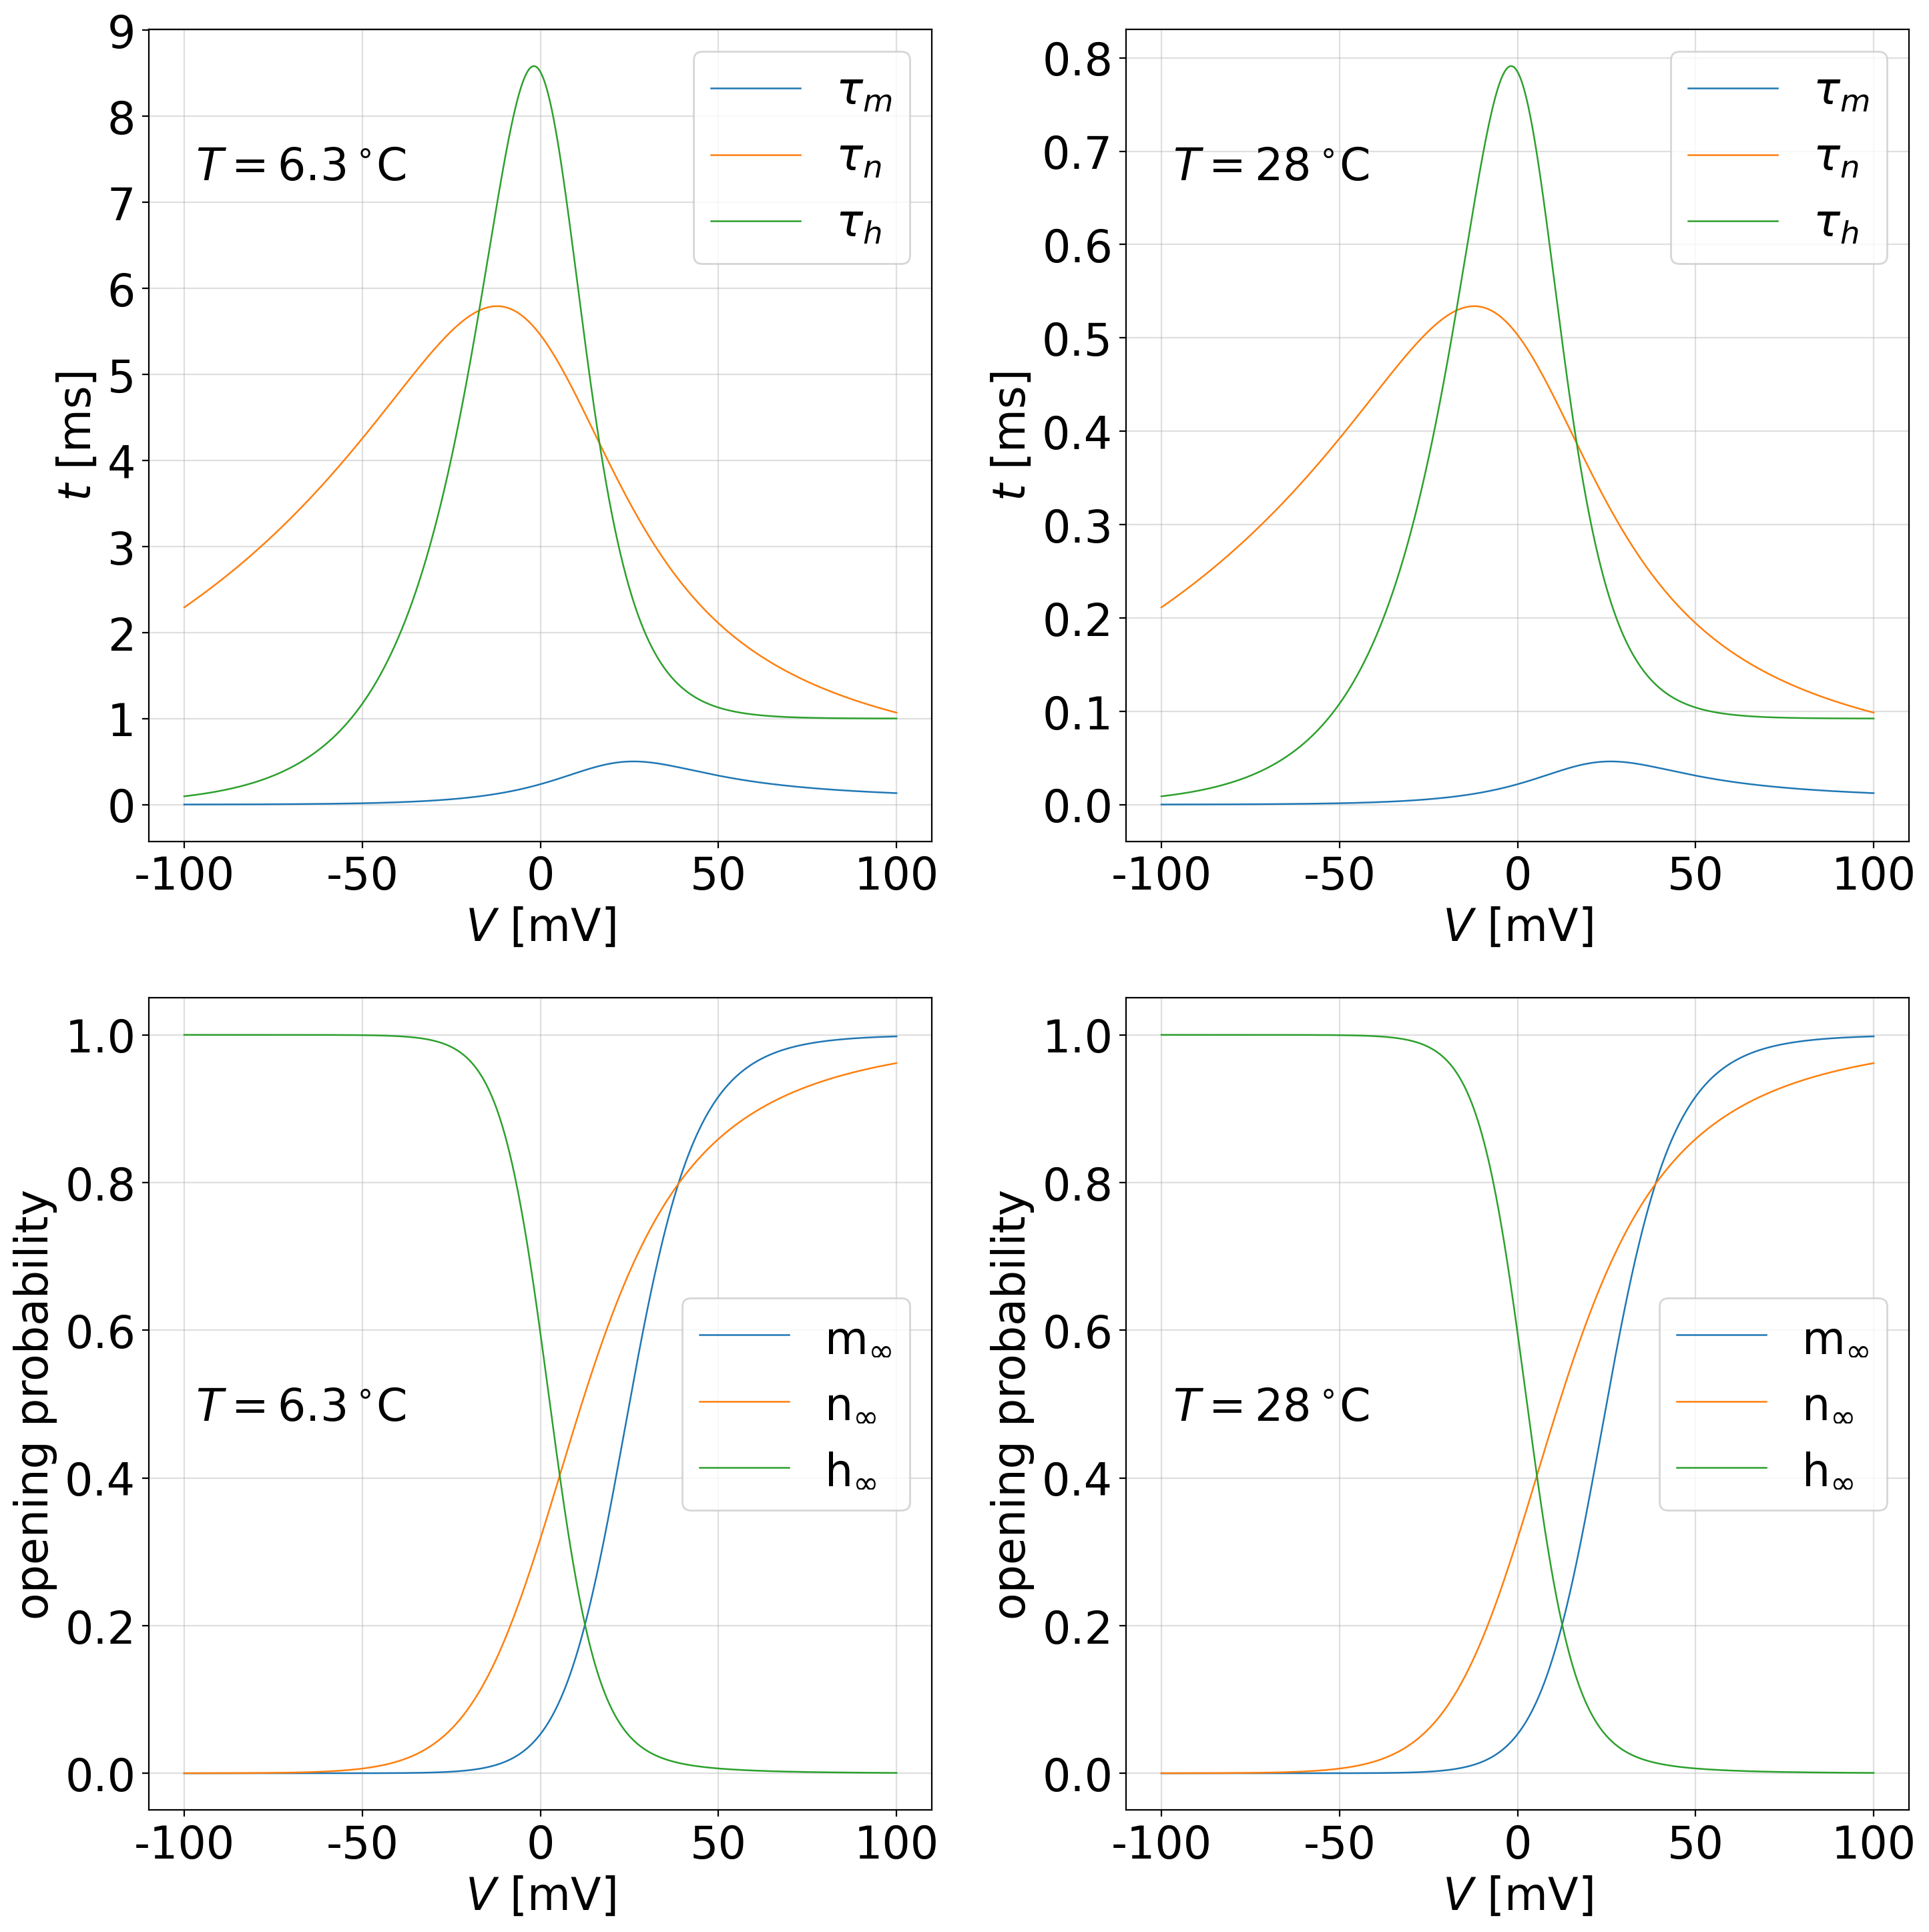

In [1]:
"""
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 24})
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = [15,6]
plt.rcParams['lines.linewidth'] = 0.9

"""
This Part is used to define global lambda functions.
You can skip it for now as you will be sent back to this part later.
Start coding in line 38
"""
# Define Voltage ODE
# This has to be done in a global scope, as every lambda function acts as a function itself
# You can utilize anonymous (lambda) functions for this and the rate equations.
# Example: to declare a square function:
# sqr = lambda n: n**2
# To use the lambda function:
# x = sqr(n)
# Insert your code here:

# Define rate equations
#   alpha and beta equations for m,n,h 
# Insert your code here:

def temp_corr(T):
    k=3**(0.1*(T-6.3))
    return k


alpha_m = lambda V , T: 1000*((2.5-100*V)/(np.exp(2.5-100*V)-1))*temp_corr(T)
alpha_m.__name__ = "m"
beta_m = lambda V, T: 4000*(np.exp((-500*V)/9))*temp_corr(T)

alpha_n = lambda V , T: 1000*((0.1-10*V)/(np.exp(1-100*V)-1))*temp_corr(T)
alpha_n.__name__ = "n"
beta_n = lambda V , T: 125*(np.exp((-25*V)/2))*temp_corr(T)

alpha_h = lambda V , T: 70*np.exp(-50*V)*temp_corr(T)
alpha_h.__name__ = "h"
beta_h = lambda V , T: 1000/(np.exp(3-100*V)+1)*temp_corr(T)

tau = lambda alpha, beta : 1/(alpha + beta)
x_inf = lambda alpha, beta : alpha/(alpha + beta)

alphas=[alpha_m,alpha_n,alpha_h]
betas=[beta_m,beta_n,beta_h]


dx_dt = lambda T, x: (1/tau(alpha_m(V,T),beta_m(V,T)))*(x_inf(alpha_m(V,T),beta_m(V,T))-x)

V=np.linspace(-100,100,1000)*1e-3

Temps = [6.3,28]
fig0, axs = plt.subplots(2,len(Temps),figsize=(15, 15))


V_ticks=np.arange(-100,101,50)
t_ticks=np.arange(0,10,1)
t_ticks2=np.around(np.arange(0,9,1)*1e-1,2)

def x_axis(i,j):
    axs[i,j].grid(alpha=0.4)
    axs[i,j].set_xticks(V_ticks*1e-3)
    axs[i,j].set_xticklabels(V_ticks)
    axs[i,j].set_xlabel("$V$ [mV]")

def y_axis(i,j,ticks):
    axs[i,j].grid(alpha=0.4)
    axs[i,j].set_yticks(ticks*1e-3)
    axs[i,j].set_yticklabels(ticks)
    axs[i,j].set_ylabel("$t$ [ms]")

for idx, T in enumerate(Temps):
        for i ,j in zip(alphas, betas):
            axs[0,idx].plot(V,tau(i(V,T),j(V,T)),label=f"$\\tau_{i.__name__}$")
        axs[0,idx].text(0.06, 0.815, f'$T = {T}'+'\,^{\\circ}$C',fontsize=24, transform=axs[0, idx].transAxes)
        x_axis(0,idx)
        y_axis(0,0,t_ticks)
        y_axis(0,1,t_ticks2)
        axs[0,idx].legend()
    
for idx, T in enumerate(Temps):
        for i ,j in zip(alphas, betas):
            axs[1,idx].plot(V,x_inf(i(V,T),j(V,T)),label=f"{i.__name__}"+"$_\\infty$")
        axs[1,idx].text(0.06, 0.48, f'$T = {T}'+'\,^{\\circ}$C',fontsize=24, transform=axs[1, idx].transAxes)
        x_axis(1,idx)
        axs[1,idx].set_ylabel("opening probability")
        axs[1,idx].legend()


plt.tight_layout()
plt.savefig(f"Parameters.pdf")
plt.show()



In [2]:
def hh_gating(V, dt, curr_gate, T):
# this function calculates the gating variables for a future time step
#
#   Inputs:
#       V:          Membrane potential of the current time step in V
#       dt:         time step in s
#       curr_gate:  gating variables of the current time step (3x1 vector)
#       T:          Simulation temperature in °C
#
#   Outputs:
#       new_gate:       gating variables of the next time step (vector 3x1)
#

	## 1) calculate gating variables
    

	# alpha and beta rate equations
	# Hint: you can also use "anonymous functions" for the rate equations, see
	# MATLAB documentation


	# Temperature correction
    

	# A and B coefficients for exponential solver
    new_gate=[]

	# calculate gating variables m,n,h for future timestep using the exponential euler solver
    #     dm/dt=[α_m(1 −m) − β_m*m]k
    #         =a_m*k-a_m*m*k - b_m*m*k
    #         =-(a_m*k+b_m*k)*m+a_m*k
    # A = -(a_m*k+b_m*k)
    # B = a_m*k
    for c, a, b in zip(curr_gate,alphas,betas):
        
        #A = -(a(V,T) + b(V,T))
        #B = (1/(a(V,T) + b(V,T)))*a(V,T)/(a(V,T) + b(V,T))
        A = -(a(V,T) + b(V,T))
        B = a(V,T)
        new_gate_x = c*np.exp(A*dt) + (B/A)*(np.exp(A*dt)-1)
        new_gate.append(new_gate_x)



	## 2) assign output
    return new_gate

hh_gating(1e-3,0.01e-3,[0.2,0.2,0.4],28)

[0.15031424001765226, 0.20264620581789294, 0.4020576418107073]

In [3]:
def hh_potential(V, dt, I_ions, I_stim):
    C_m = 1e-6
    I_ion = np.sum(I_ions)
    V_new = V + dt*(1/C_m)*(-I_ion + I_stim)
    return V_new
hh_potential(1e-3,0.001e-3,[6e-3,3e-3,-2e-3],10e-3)


0.003999999999999999

In [4]:
def hh_model(I_stim, t_end, dt, T):
# this function simulates a Hodgkin Huxley neuron model
#
#   Inputs:
#       I_stim:     stimulation current as a vector
#       t_end:      simulation duration in s
#       dt:         time step in s
#       T:          simulation temperature in °C
#       V_rest:     membrane resting potential in V
#   Outputs:
#       V:          membrane potentials as a vector
#       gates:      gating variables in a 3xlength(t) matrix form, rows being m - n - h
#       I_ions:     ion currents in a 3xlength(t) matrix form: rows being i_na - i_k - i_l
#       t:          time vector
#
## Definitions and constants

# resting potential
    Vrest = 0
    
    # running time
    t = np.arange(0, t_end + dt, dt)
    
    # conductivities and Nernst potentials
    gNa = 120*1e-3
    gK = 36*1e-3
    gL = 0.3*1e-3
    
    VNa = 115*1e-3
    VK = -12*1e-3
    VL = 10.6*1e-3
    
    # rate equations
    
    
    # Potential vector 1xlength
    V = np.zeros(len(t))
    
    # all matrices are 3xlenght, with the rows always being m - n - h
    gates = np.zeros((3, len(t)))
    I_ions = np.zeros((3, len(t)))
    
    
    ## Initial calculations
    # initialize first voltage value
    V[0] = Vrest
    #print(V[0])
    
    # calculate the rates (alpha and beta) for initial voltage
    alphas_0=[]
    betas_0=[]
    for a, b in zip(alphas,betas):
        a_0 = a(V[0],T)
        b_0 = b(V[0],T)
        alphas_0 = np.append(alphas_0,a_0)
        betas_0 = np.append(betas_0,b_0)

        
    # use the steady-state equations to obtain the initial gating variable states
    x_0=[]
    for a, b in zip(alphas_0,betas_0):
        x = x_inf(a,b)
        x_0 = np.append(x_0,x)
    print(x_0)
    print(gates[0][0].shape)
    for i in range(3):
        gates[i][0] = x_0[i]
    #print(gates)

    INa= np.zeros(len(t))
    IK= np.zeros(len(t))
    IL= np.zeros(len(t))
    ## iterative calculation of the membrane potential
    for i in range(len(t)-1):
    
        # calculate ionic currents for current timestep
        INa[i]=gNa* gates[0][i]**3 *gates[2][i] *(V[i]-VNa)
        IK[i] = gK*gates[1][i]**4*(V[i]-VK)
        IL[i]= gL*(V[i]-VL)
        I_ions_i = [INa[i],IK[i],IL[i]]
        for j in range(3):
            I_ions[j][i] = I_ions_i[j]        
        
        # calculate membrane potential of a future timestep
        # print(I_ions[:, i].shape)
        # f=np.arange(0,2,1)
        # print(f.shape)
        # print(V[i].shape)
        # print(hh_potential(V[i], dt, I_ions[:, i], I_stim[i]).shape)
        V[i+1] = hh_potential(V[i], dt, I_ions[:, i], I_stim[i])
        
        
        # calculate gating variables of a future timestep
        gates[:, i+1] = hh_gating(V[i], dt, gates[:, i], T)
    ## assign outputs
    return V, gates, I_ions, t
#       V:          membrane potentials as a vector
#       gates:      gating variables in a 3xlength(t) matrix form, rows being m - n - h
#       I_ions:     ion currents in a 3xlength(t) matrix form: rows being i_na - i_k - i_l
#       t:          time vector





In [5]:
# 1) Define Variables

t_end  =	100e-3
dt     =	0.01e-3
T1     =	6.3
T2     =	28

#  2) Create two stimulation currents
#1. At 6.3 ◦C induce a stair of five 5ms long rectangular current pulses with a gap of 10ms and the amplitudes 2 µA, 3 µA, 4 µA, 6 µA, 8 µA

# 2. At 28 ◦C induce a stair of five 5ms long rectangular current pulses with a gap of 10ms and the amplitudes 2 µA, 4 µA, 8 µA, 16 µA, 32 µA
t = np.arange(0, t_end + dt, dt)
# Insert your code here:
pulsewidth = 5e-3
gapwidth = 10e-3 
pusles1=np.array([2,3,4,6,8])*1e-6
pusles2=np.array([2,4,8,16,32])*1e-6
I_stim1 = np.zeros(len(t))
I_stim2 = np.zeros(len(t))
def pulses (I_stim, pulses):
    for k in range(0,5):
        for idx, i in enumerate(t):  
            if (i > k*(gapwidth+pulsewidth)) and (i < (k*gapwidth + (k+1)*pulsewidth)):
                I_stim[idx] = pulses[k]
    return I_stim
pulses(I_stim1,pusles1)
pulses(I_stim2,pusles2)

array([0.e+00, 2.e-06, 2.e-06, ..., 0.e+00, 0.e+00, 0.e+00])

[0.05293249 0.31767691 0.59612075]
()
[0.05293249 0.31767691 0.59612075]
()
[0.00000000e+00 3.23709182e-09 2.00064523e-05 ... 1.77707085e-05
 1.77449027e-05 1.77188737e-05]
[[-1.22005718e-06 -1.22005714e-06 -1.21984498e-06 ... -1.22796550e-06
  -1.22795553e-06  0.00000000e+00]
 [ 4.39973347e-06  4.39973465e-06  4.40706873e-06 ...  4.40521487e-06
   4.40523496e-06  0.00000000e+00]
 [-3.18000000e-06 -3.17999903e-06 -3.17399806e-06 ... -3.17466879e-06
  -3.17467653e-06  0.00000000e+00]]
[-20   0  20  40  60  80 100 120]
[-20   0  20  40  60  80]


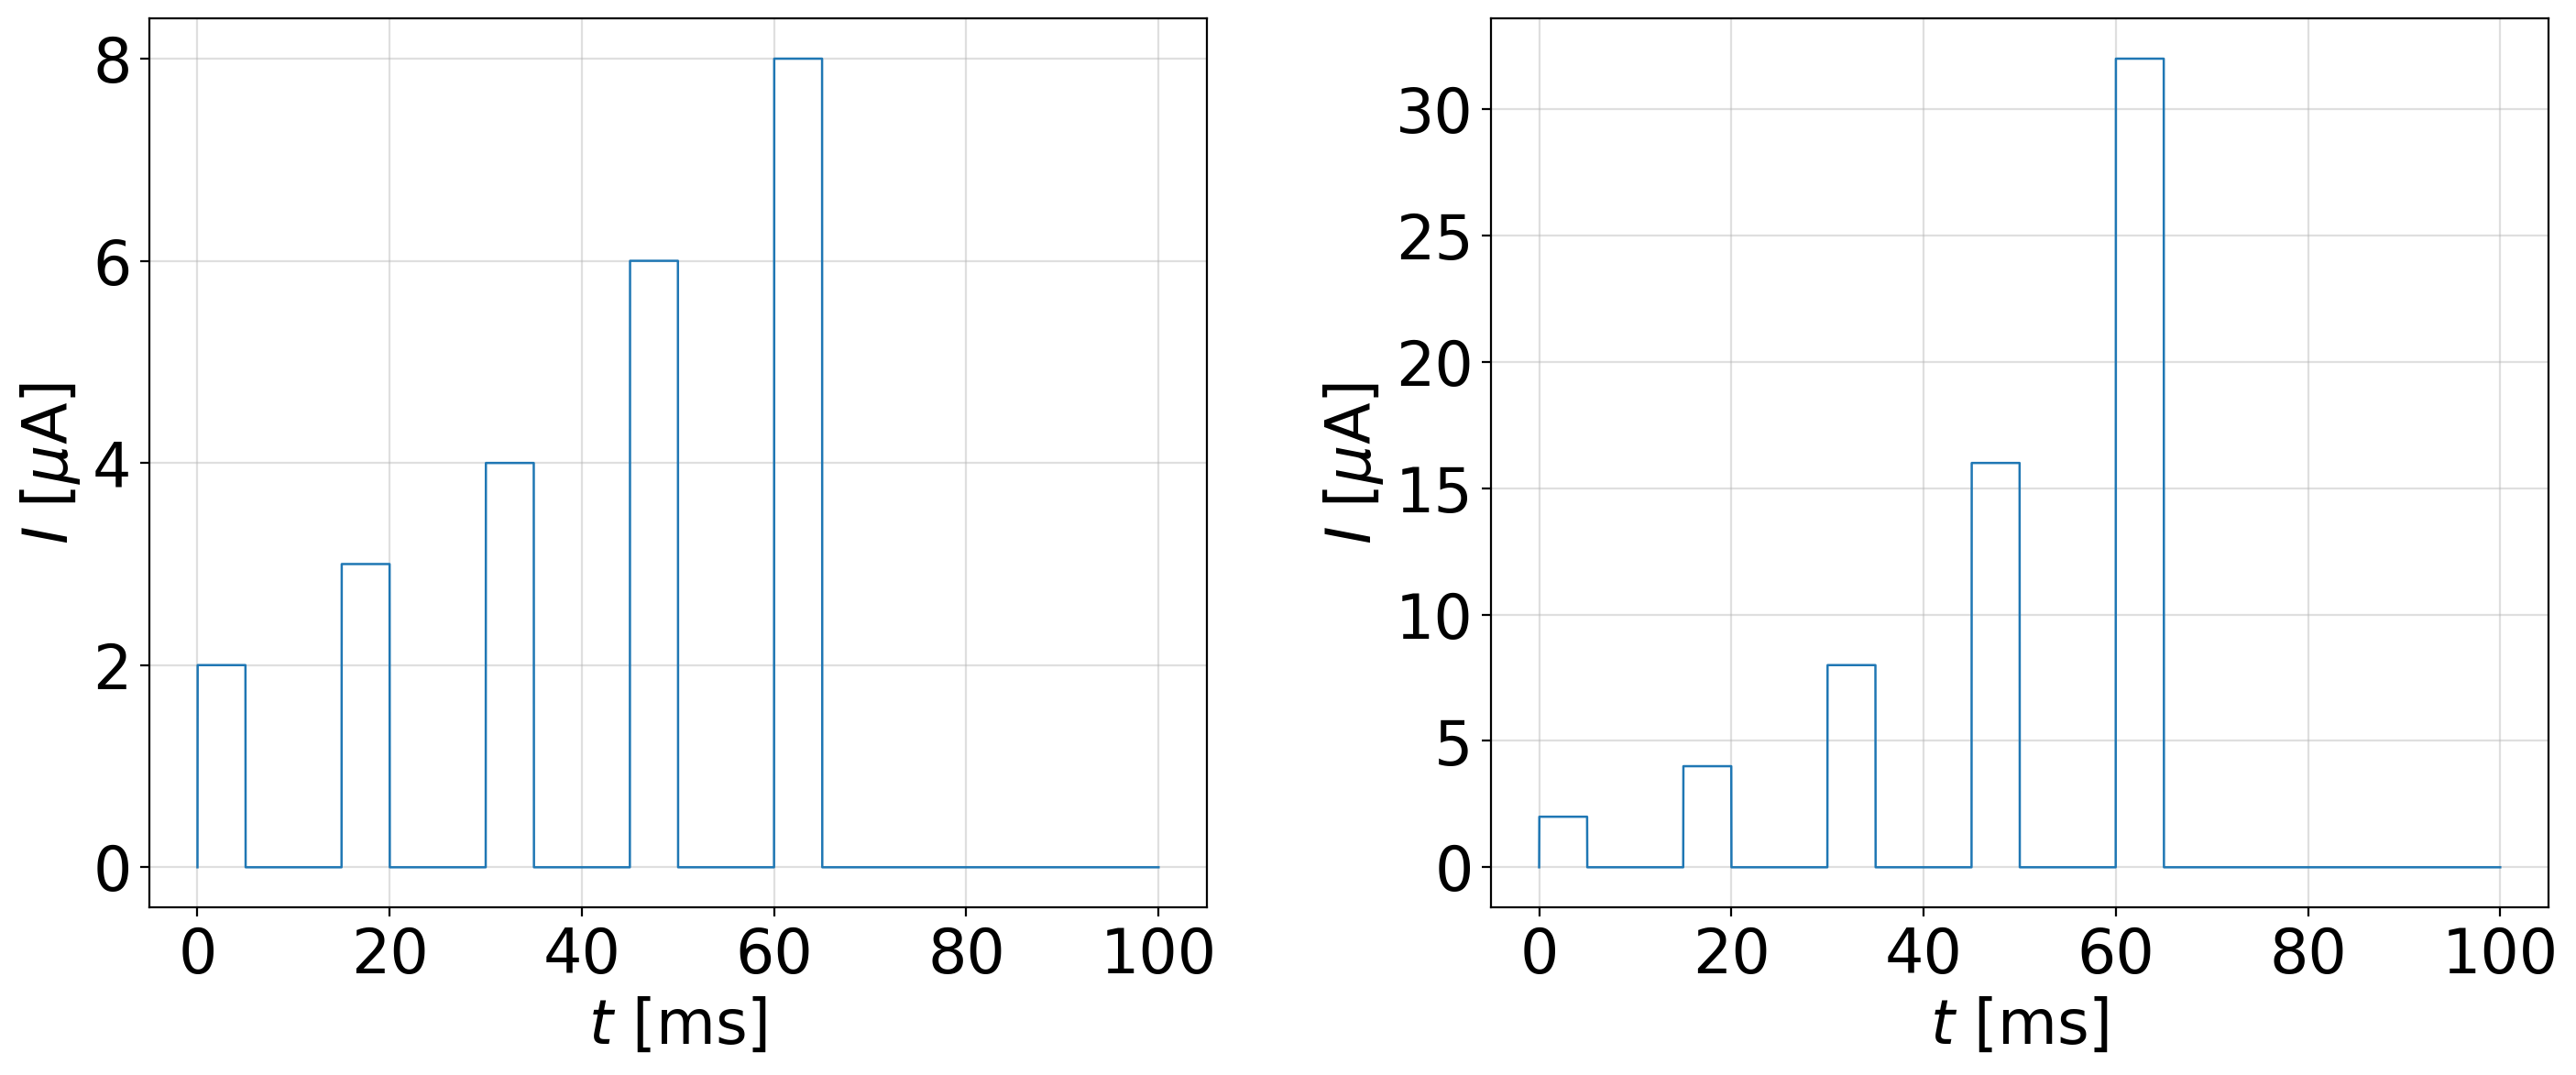

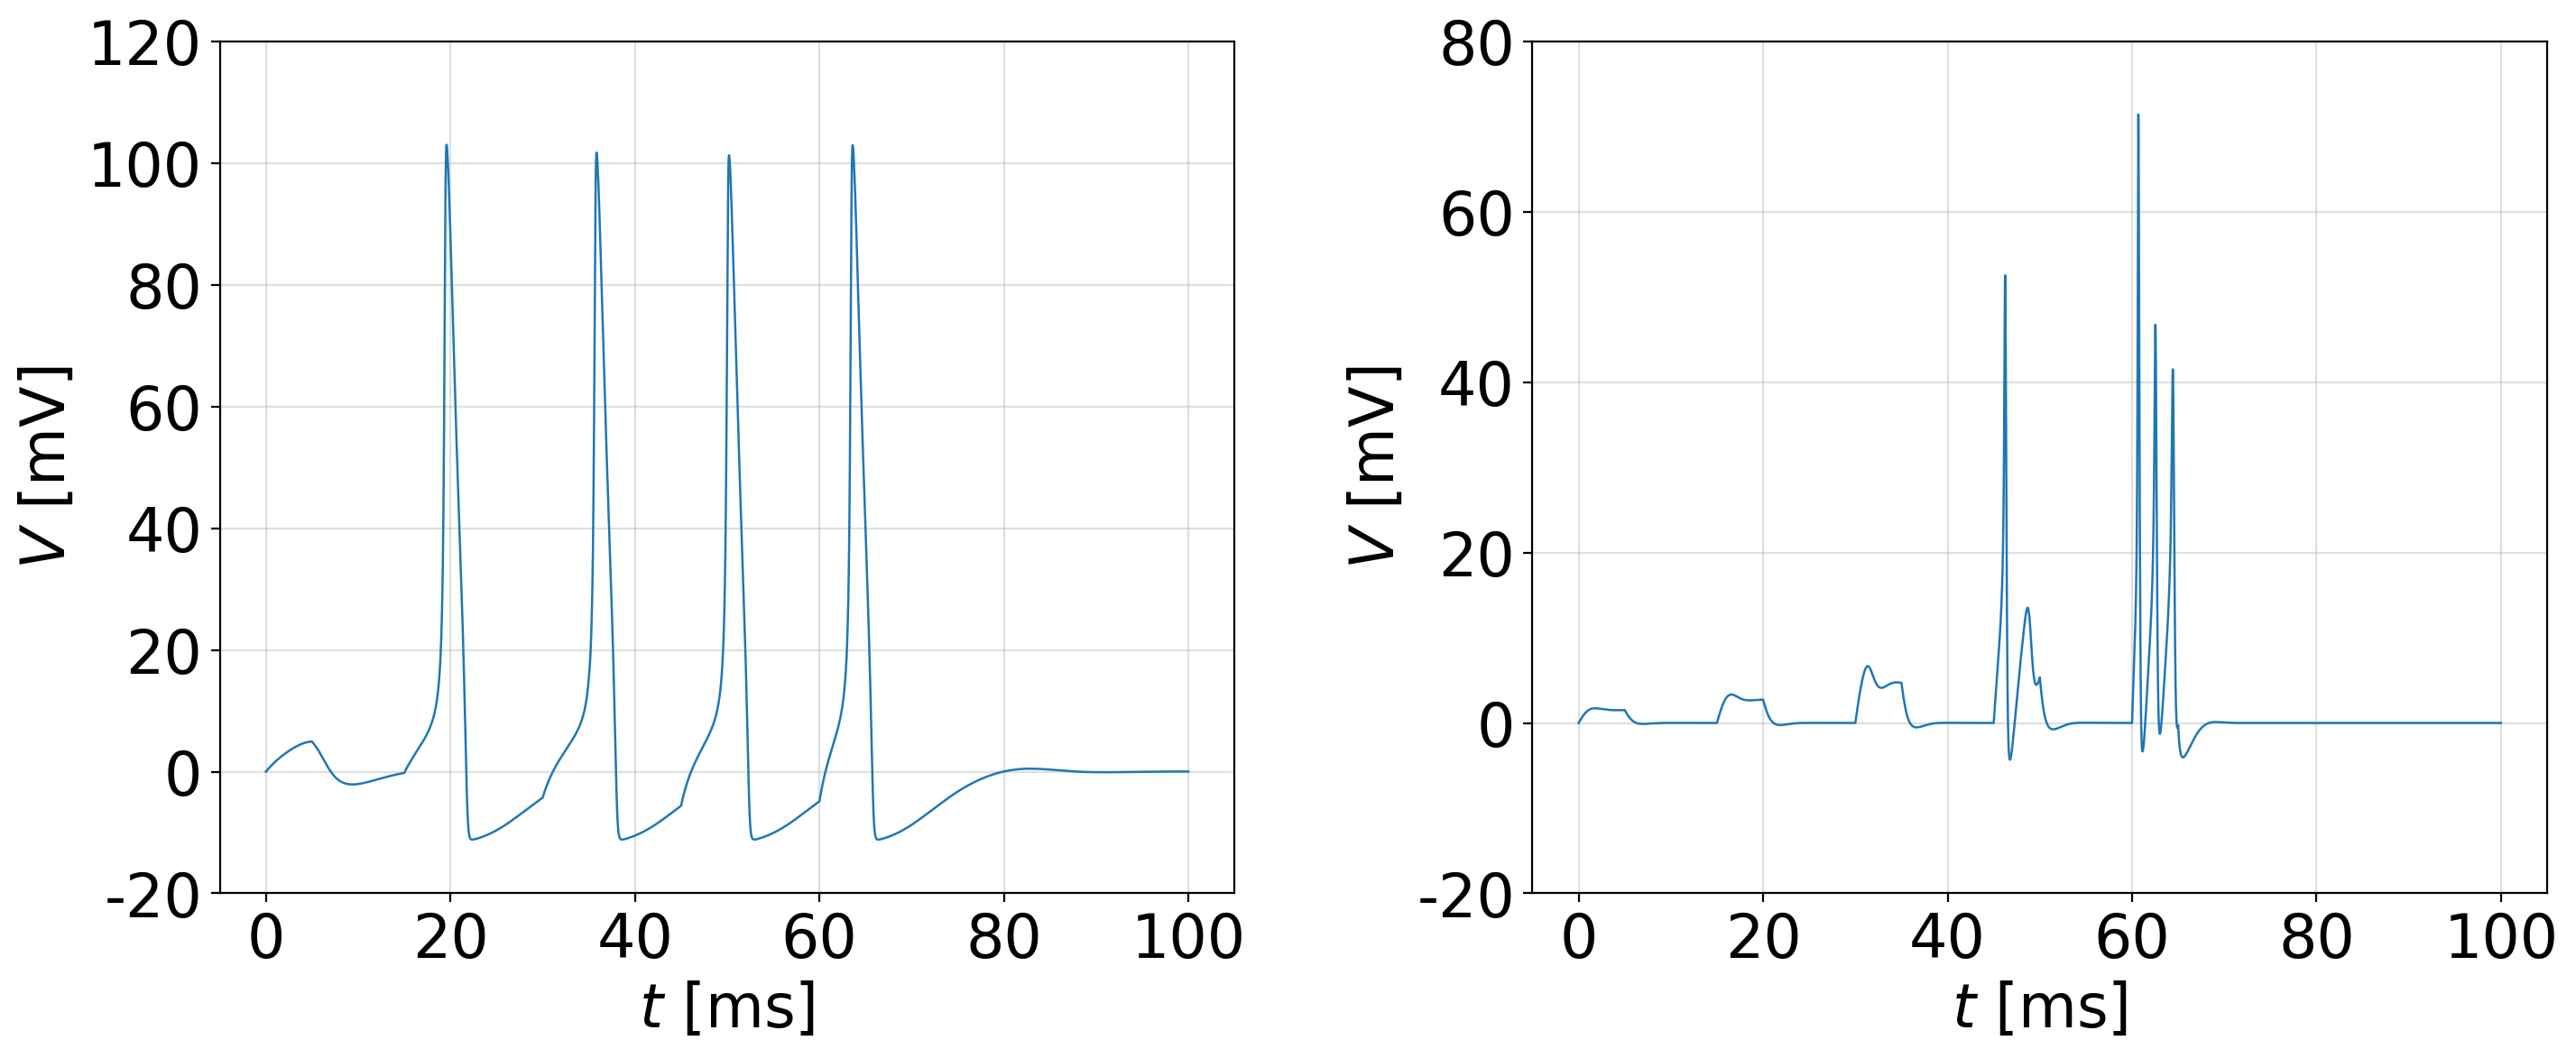

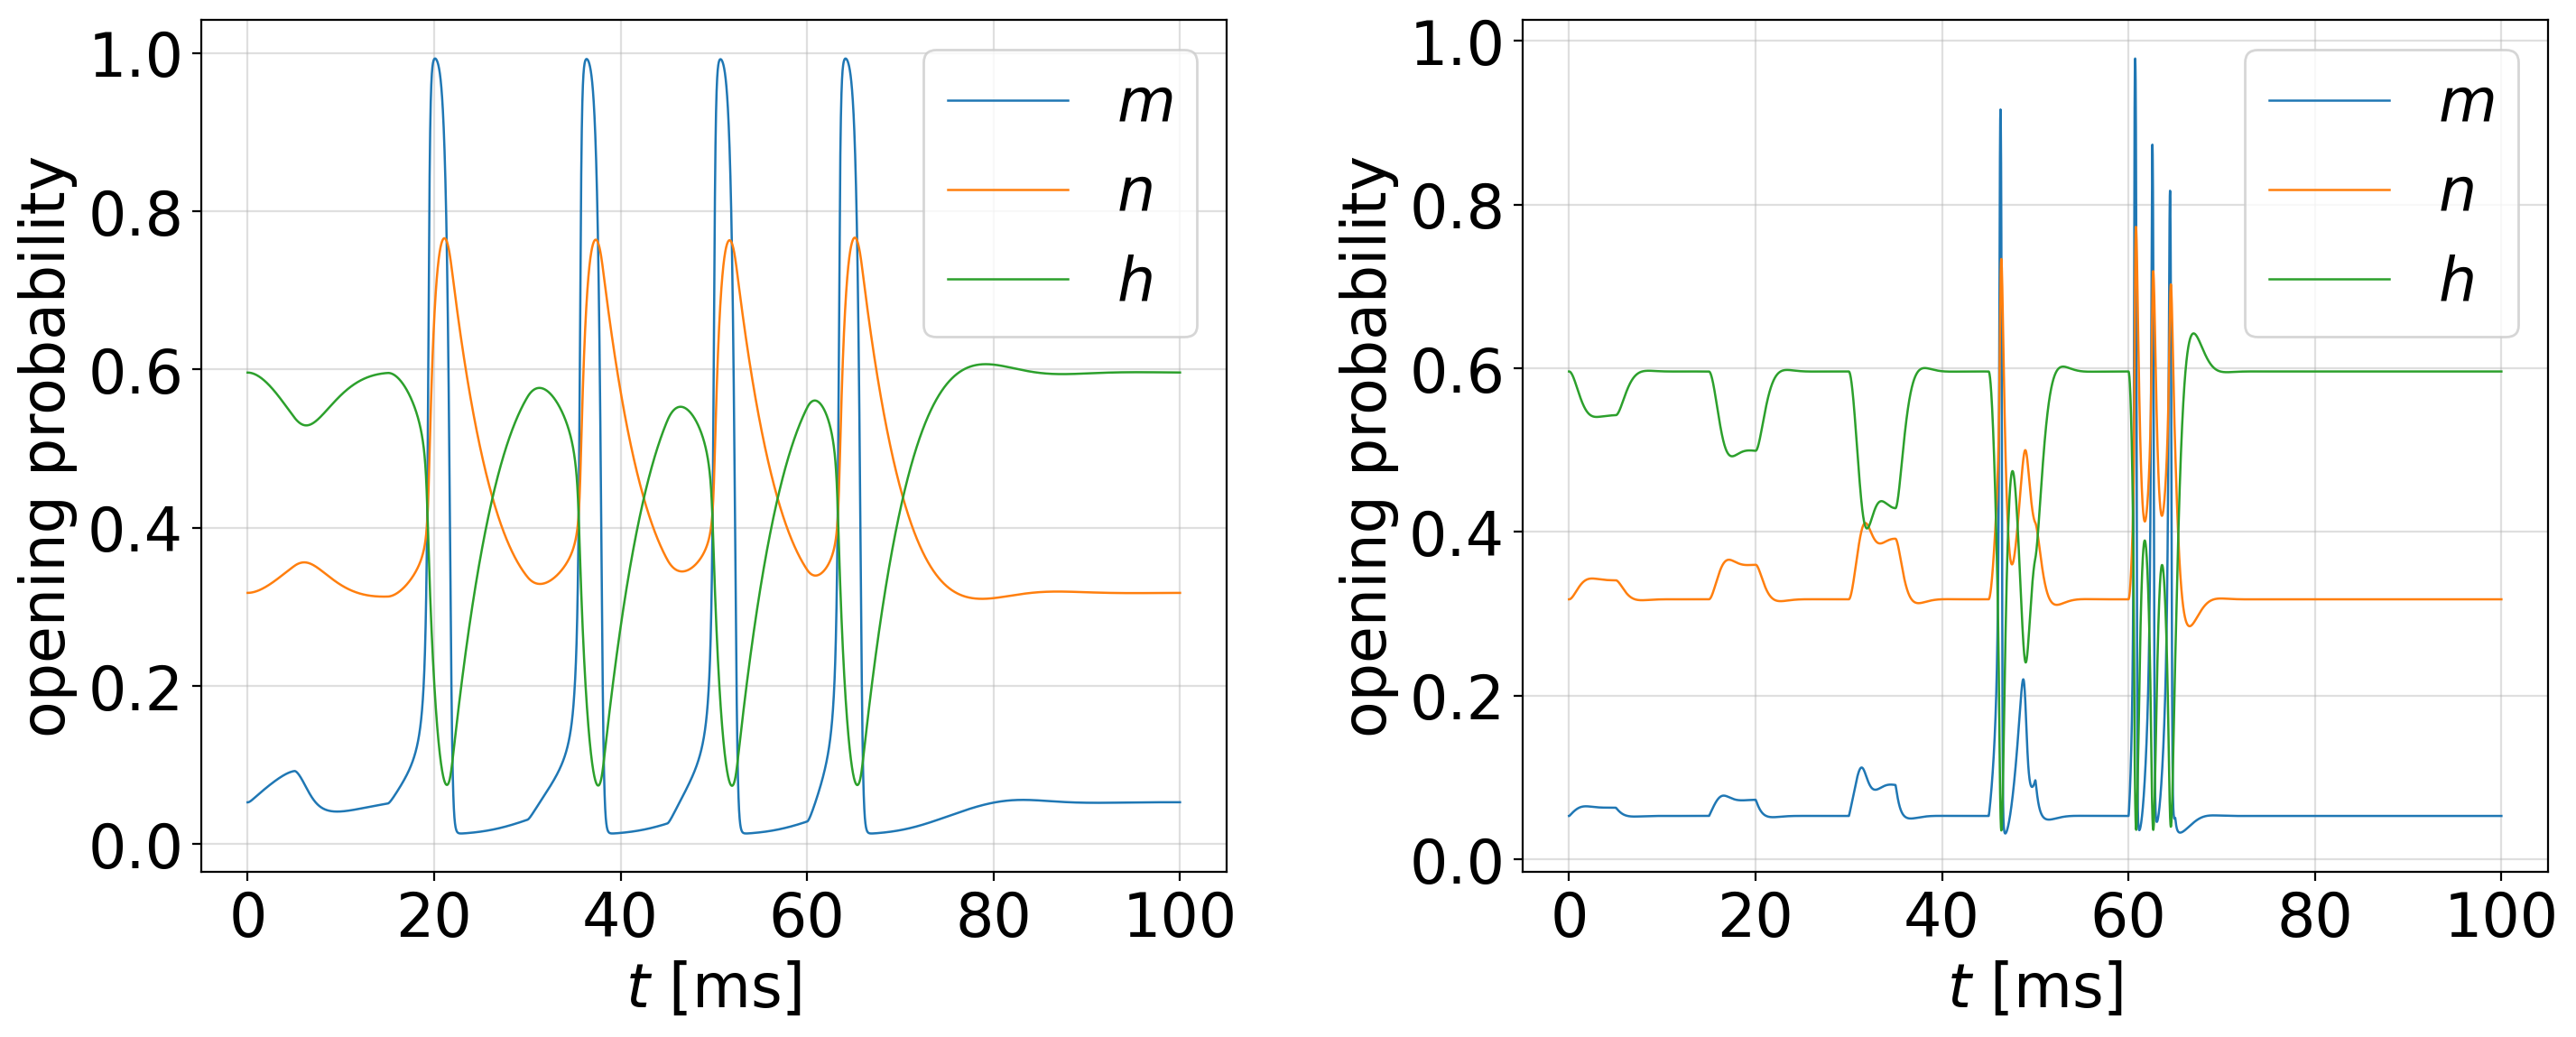

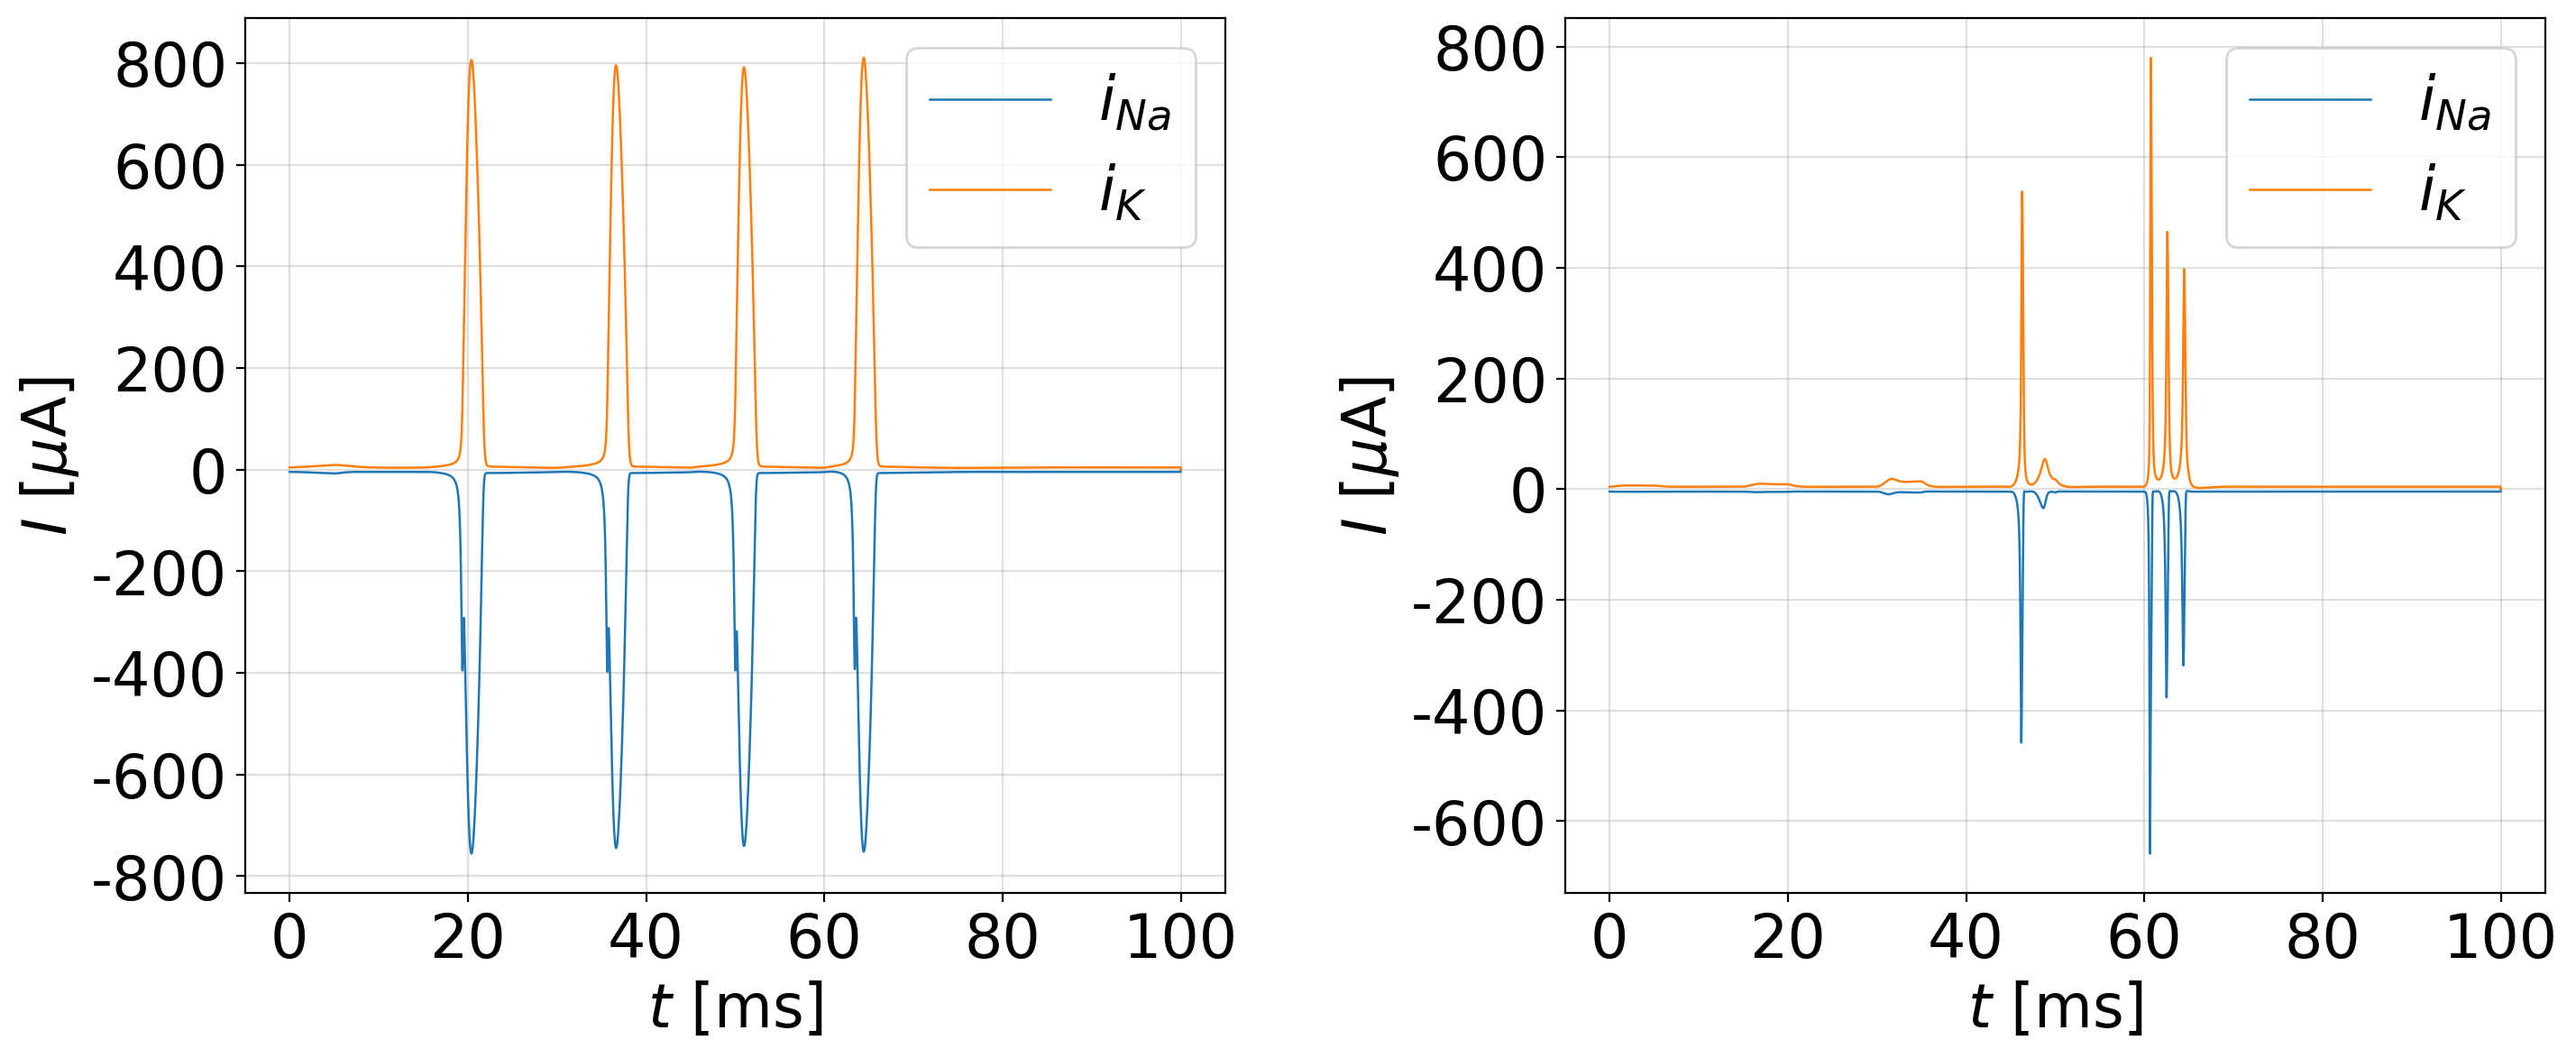

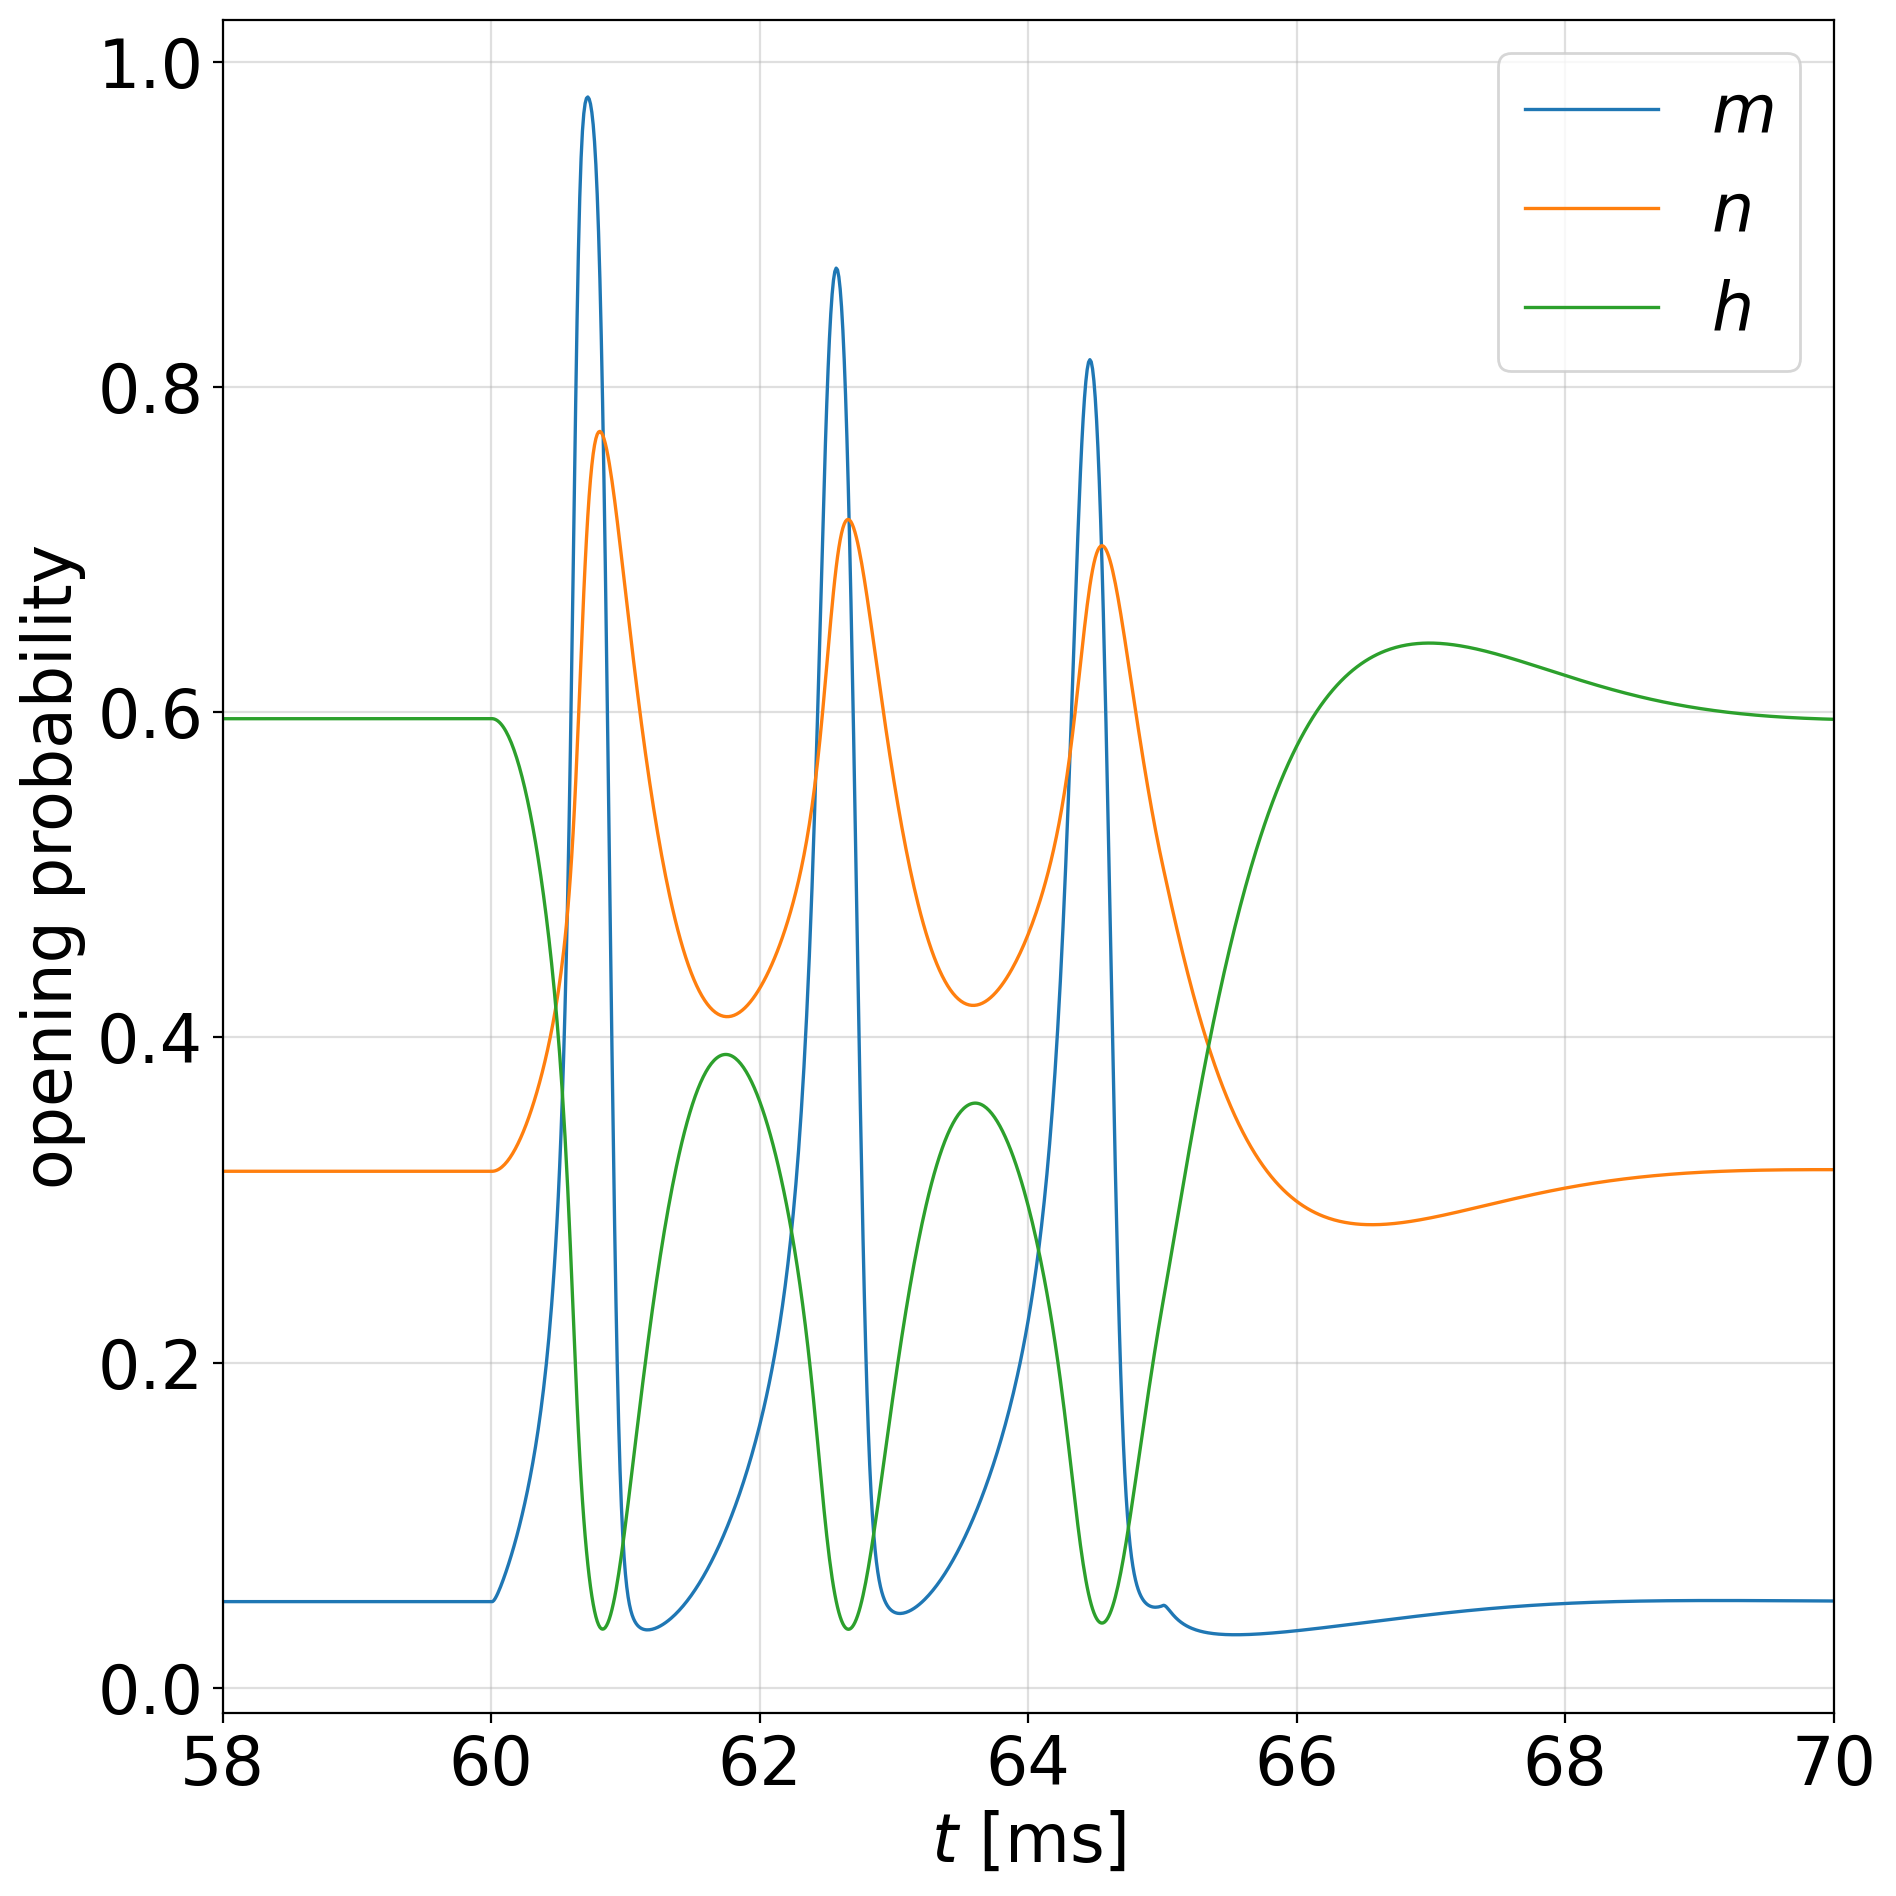

In [25]:
#  3) Run the hh_model function for both stimuli (with different temperatures)

V1, gates1, I_ions1, t1 = hh_model(I_stim1,t_end,dt,T1)
V2, gates2, I_ions2, t2 = hh_model(I_stim2,t_end,dt,T2)
print(V1)
print(I_ions1)
#  4) Plot the results


# def x_axis(i,j):
#     ax{j}[i,j].grid(alpha=0.4)
#     axs[i,j].set_xticks(V_ticks*1e-3)
#     axs[i,j].set_xticklabels(V_ticks)
#     axs[i,j].set_xlabel("$V$ [mV]")

# def y_axis(i,j,ticks):
#     axs[i,j].grid(alpha=0.4)
#     axs[i,j].set_yticks(ticks*1e-3)
#     axs[i,j].set_yticklabels(ticks)
#     axs[i,j].set_ylabel("$t$ [ms]")

params=["m","n","h"]

def time_axis(axis):
    plt.tight_layout()
    ticks=np.arange(0,120,20)
    for i in range(2):
        axis[i].grid(alpha=0.4)
        axis[i].set_xticks(ticks*1e-3)
        axis[i].set_xticklabels(ticks)
        axis[i].set_xlabel("$t$ [ms]")

# Insert your code here:
# Plot 1 a): Input current I_stim1 for simulation at 6.3°C
fig1, ax1 = plt.subplots(1,2)

for i in range(2):
    ax1[i].grid(alpha=0.4)
    ax1[i].set_ylabel("$I$ [$\\mu$A]")
y_current = np.arange(0,12,2)
y_current2 = np.arange(0,40,5)

ax1[0].set_yticks(y_current*1e-6)
ax1[0].set_yticklabels(y_current)
ax1[1].set_yticks(y_current2*1e-6)
ax1[1].set_yticklabels(y_current2)

time_axis(ax1)
ax1[0].plot(t,I_stim1)
# Plot 1 b): Input current I_stim2 for simulation at 28°C
ax1[1].plot(t,I_stim2)
fig1.savefig(f"Input_current.pdf")
# Plot 2 a): Membrane Potential for I_stim1 and 6.3°C
fig2, ax2 = plt.subplots(1,2)

for i in range(2):
    ax2[i].grid(alpha=0.4)
    ax2[i].set_ylabel("$V$ [mV]")
y_voltage = np.arange(-20, 140, 20)
print(y_voltage)
y_voltage2 = np.arange(-20, 100, 20)
print(y_voltage2)
ax2[0].set_yticks(y_voltage*1e-3)
ax2[0].set_yticklabels(y_voltage)
ax2[0].set_ylim(min(y_voltage)*1e-3,max(y_voltage)*1e-3)

ax2[1].set_yticks(y_voltage2*1e-3)
ax2[1].set_yticklabels(y_voltage2)
ax2[1].set_ylim(min(y_voltage2)*1e-3,max(y_voltage2)*1e-3)

time_axis(ax2)
ax2[0].plot(t,V1)
# Plot 2 b): Membrane Potential for I_stim2 and 28°C
ax2[1].plot(t,V2)
fig2.savefig(f"Membrane_Potential.pdf")
# Plot 3 a): Gating Variables for I_stim1 and 6.3°C
fig3, ax3 = plt.subplots(1,2)

for i in range(2):
    ax3[i].grid(alpha=0.4)
    ax3[i].set_ylabel("opening probability")

time_axis(ax3)
for idx, i in enumerate(gates1):
    ax3[0].plot(t,gates1[idx],label=f"${params[idx]}$")
ax3[0].legend()
# Plot 3 b): Gating Variables for I_stim2 and 28°C
for idx, i in enumerate(gates2):
    ax3[1].plot(t,gates2[idx],label=f"${params[idx]}$")
ax3[1].legend()
fig3.savefig(f"Gating_Variables.pdf")
# Plot 4 a): Currents I_Na and I_K for I_stim1 and 6.3°C
fig4, ax4 = plt.subplots(1,2)

y_2current = np.arange(-800,1000,200)
for i in range(2):
    ax4[i].grid(alpha=0.4)
    ax4[i].set_ylabel("$I$ [$\\mu$A]")
    ax4[i].set_yticks(y_2current*1e-6)
    ax4[i].set_yticklabels(y_2current)

time_axis(ax4)

Na1=I_ions1[0]+I_ions1[2]
K1=I_ions1[1]
currents1=[Na1, K1]

Na2=I_ions2[0]+I_ions2[2]
K2=I_ions2[1]
currents2=[Na2, K2]

currents_name= ["{Na}", "K"]
for idx, i in enumerate(currents1):
    ax4[0].plot(t,i,label=f"$i_{currents_name[idx]}$")
ax4[0].legend()
# Plot 4 b): Currents I_Na and I_K for I_stim2 and 28°C
for idx, i in enumerate(currents2):
    ax4[1].plot(t,i,label=f"$i_{currents_name[idx]}$")
ax4[1].legend()
fig4.savefig(f"Currents_I_Na_and I_K.pdf")

#plt.rcParams.update({"font.size": 36})
fig5, ax5 = plt.subplots(1,1, figsize=(10, 10))
for idx, i in enumerate(gates2):
    ax5.plot(t,gates2[idx],label=f"${params[idx]}$",lw=1.2)
ticks=np.arange(58,72,2)
ax5.grid(alpha=0.4)
ax5.set_xticks(ticks*1e-3)
ax5.set_xticklabels(ticks)
ax5.set_xlabel("$t$ [ms]")
ax5.set_xlim(0.058,0.07)
ax5.set_ylabel("opening probability")
ax5.legend()
plt.tight_layout()
fig5.savefig(f"Gating_Variables_close.pdf")
# Plot 5 a): Phase plot for I_stim1 and 6.3°C

# Plot 5 b): Phase plot for I_stim2 and 28°C

